In [1]:
print("Name: Harish P")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Name: Harish P


Data Visualization and Preprocessing

In [2]:
# 1: Downloading the Dataset.
# 2: Loading the Dataset

df=pd.read_csv(r"C:\Users\hp\Downloads\archive (1)\Bowling\Bowling_t20.csv")
df = df.drop(columns=["Player"])
df = df.drop(columns=["Sl.No"])
df = df.drop(columns=["BBI"])
df = df.drop(columns=["Span"])

df.head()

,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,Four,Five
0,79,79,284.5,1,2061,106,19.44,7.23,16.1,1,2
1,99,97,361.2,4,2396,98,24.44,6.63,22.1,3,0
2,76,75,277.5,2,1894,92,20.58,6.81,18.1,3,1
3,64,63,238.2,2,1516,85,17.83,6.36,16.8,4,0
4,60,60,200.3,2,1443,85,16.97,7.19,14.1,4,2


In [3]:
df['Inns'] = pd.to_numeric(df['Inns'], errors='coerce')
df['Overs'] = pd.to_numeric(df['Overs'], errors='coerce')
df['Mdns'] = pd.to_numeric(df['Mdns'], errors='coerce')
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')
df['Wkts'] = pd.to_numeric(df['Wkts'], errors='coerce')
df['Ave'] = pd.to_numeric(df['Ave'], errors='coerce')
df['Econ'] = pd.to_numeric(df['Econ'], errors='coerce')
df['Four'] = pd.to_numeric(df['Four'], errors='coerce')
df['Five'] = pd.to_numeric(df['Five'], errors='coerce')
df['SR'] = pd.to_numeric(df['SR'], errors='coerce')

median_Inns = df['Inns'].median()
median_Overs = df['Overs'].median()
median_Mdns = df['Mdns'].median()
median_Runs = df['Runs'].median()
median_Wkts = df['Wkts'].median()
median_Ave = df['Ave'].median()
median_Econ = df['Econ'].median()
median_Four = df['Four'].median()
median_Five = df['Five'].median()
median_SR = df['SR'].median()

df['Inns'].fillna(median_Inns, inplace=True)
df['Overs'].fillna(median_Overs, inplace=True)
df['Mdns'].fillna(median_Mdns, inplace=True)
df['Runs'].fillna(median_Runs, inplace=True)
df['Wkts'].fillna(median_Wkts, inplace=True)
df['Ave'].fillna(median_Ave, inplace=True)
df['Econ'].fillna(median_Econ, inplace=True)
df['Four'].fillna(median_Four, inplace=True)
df['Five'].fillna(median_Five, inplace=True)
df['SR'].fillna(median_SR, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     2006 non-null   int64  
 1   Inns    2006 non-null   float64
 2   Overs   2006 non-null   float64
 3   Mdns    2006 non-null   float64
 4   Runs    2006 non-null   float64
 5   Wkts    2006 non-null   float64
 6   Ave     2006 non-null   float64
 7   Econ    2006 non-null   float64
 8   SR      2006 non-null   float64
 9   Four    2006 non-null   float64
 10  Five    2006 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 172.5 KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     2006 non-null   int64  
 1   Inns    2006 non-null   float64
 2   Overs   2006 non-null   float64
 3   Mdns    2006 non-null   float64
 4   Runs    2006 non-null   float64
 5   Wkts    2006 non-null   float64
 6   Ave     2006 non-null   float64
 7   Econ    2006 non-null   float64
 8   SR      2006 non-null   float64
 9   Four    2006 non-null   float64
 10  Five    2006 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 172.5 KB


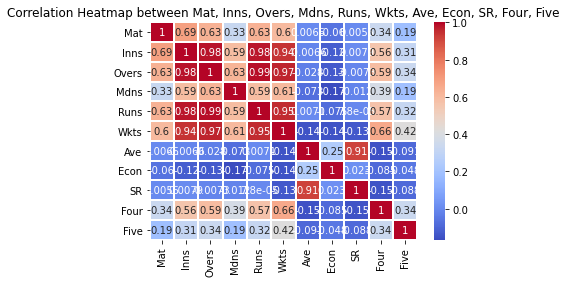

In [6]:
# Multivariate Analysis - 2.

l=df.columns.tolist()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title(f'Correlation Heatmap between {", ".join(l)}')
plt.show()

In [7]:
# 4. Descriptive Statistics.

df.describe()

,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,Four,Five
count,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000
mean,11.231805,7.306580,22.517198,0.234297,167.978066,7.157527,26.058928,7.847712,20.627667,0.102193,0.020937
std,14.923332,9.809112,32.885764,0.676606,240.750733,10.871506,12.354621,2.024361,8.792282,0.379033,0.159676
min,1.000000,1.000000,0.100000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
25%,3.000000,3.000000,8.025000,0.000000,61.000000,2.000000,22.117500,7.070000,18.000000,0.000000,0.000000
50%,5.000000,4.000000,12.000000,0.000000,90.000000,4.000000,24.000000,7.640000,19.200000,0.000000,0.000000
75%,13.000000,7.000000,20.000000,0.000000,147.000000,6.000000,25.737500,8.207500,20.275000,0.000000,0.000000
max,111.000000,97.000000,361.200000,6.000000,2396.000000,106.000000,158.000000,36.000000,144.000000,4.000000,2.000000


In [8]:
# 5. Handling the Missing Values.

df.isnull().sum()

# There is null values which has to be handled.

Mat      0
Inns     0
Overs    0
Mdns     0
Runs     0
Wkts     0
Ave      0
Econ     0
SR       0
Four     0
Five     0
dtype: int64

In [9]:
# 6. Dependent Variables.

y = df['Wkts']
y.head()

0    106.0
1     98.0
2     92.0
3     85.0
4     85.0
Name: Wkts, dtype: float64

In [10]:
# 7. Independent Variables.

x=df.drop(columns =['Wkts'],axis =1)
x.head()

,Mat,Inns,Overs,Mdns,Runs,Ave,Econ,SR,Four,Five
0,79,79.0,284.5,1.0,2061.0,19.44,7.23,16.1,1.0,2.0
1,99,97.0,361.2,4.0,2396.0,24.44,6.63,22.1,3.0,0.0
2,76,75.0,277.5,2.0,1894.0,20.58,6.81,18.1,3.0,1.0
3,64,63.0,238.2,2.0,1516.0,17.83,6.36,16.8,4.0,0.0
4,60,60.0,200.3,2.0,1443.0,16.97,7.19,14.1,4.0,2.0


In [11]:
# 8. Scaling

scale =StandardScaler()
x_scaled =pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x_scaled.head()


,Mat,Inns,Overs,Mdns,Runs,Ave,Econ,SR,Four,Five
0,4.542222,7.310682,7.968437,1.131964,7.864956,-0.535879,-0.305215,-0.515088,2.369267,12.397294
1,5.882740,9.146168,10.301334,5.566965,9.256784,-0.131071,-0.601679,0.167499,7.647168,-0.131155
2,4.341145,6.902796,7.755525,2.610298,7.171120,-0.443583,-0.512740,-0.287559,7.647168,6.133069
3,3.536834,5.679139,6.560181,2.610298,5.600639,-0.666227,-0.735088,-0.435453,10.286119,-0.131155
4,3.268731,5.373224,5.407420,2.610298,5.297346,-0.735854,-0.324980,-0.742617,10.286119,12.397294


In [12]:
# 9. Spliting into Training and Splitting Data.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=10)

In [13]:
# 10. Check Shape

x_train.shape

(1404, 10)

In [14]:
y_train.shape

(1404,)

In [15]:
x_test.shape

(602, 10)

In [16]:
y_test.shape

(602,)

Model Building

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_predict = lr.predict(x_test)
y_predict

array([ 2.45560595e+01,  2.05692032e+01, -2.28776402e+00,  4.12320816e+00,
        4.20980354e+00,  1.19473469e+01,  1.72622059e+00,  1.32659419e+00,
        3.91213191e+00,  1.92424974e+00,  3.96625403e+00,  2.31974885e+00,
        1.04567636e+00,  7.14364480e+00,  1.40713068e-01,  3.92295634e+00,
        3.70969829e+00,  3.90130749e+00,  3.91754413e+00,  4.24189439e+01,
        1.27795414e-02,  6.70212805e+00,  3.90130749e+00,  3.34022529e+00,
        8.13156459e-01, -9.91492428e-01,  1.24466607e+00,  1.74099303e+01,
        3.90130749e+00,  3.26346863e+00,  9.23805833e+00,  7.56161665e-01,
        1.14491072e+01,  8.11665500e-01,  3.90130749e+00,  3.90671970e+00,
        9.81338388e-02,  1.17655079e+00,  2.31477254e+00,  9.22824142e+00,
        1.59807067e-01,  3.91754413e+00,  3.92295634e+00,  3.13149751e+01,
        3.32968940e+00,  4.67920224e+01,  3.91213191e+00,  4.90622693e+00,
        6.56807188e+00,  5.31650133e+01,  1.34896439e+01,  4.99140188e+00,
        3.90671970e+00,  

In [20]:
y_predict1 =lr.predict(x_train)
y_predict1

array([3.91213191, 4.07991047, 4.01496393, ..., 4.73220565, 0.64964574,
       0.6363924 ])

In [21]:
profit =pd.DataFrame({'Actual Quality':y_test,'Predicted Quality':y_predict})
profit

,Actual Quality,Predicted Quality
110,28.0,24.556060
203,17.0,20.569203
1068,1.0,-2.287764
1809,4.0,4.123208
1635,4.0,4.209804
...,...,...
1845,4.0,3.960842
697,4.0,4.366303
1042,1.0,-0.122987
684,4.0,3.995230
